### Good Data Criteria
- Covers important cases (good coverage of various $x$)
- Is defined consistently (definitions of labels $y$ is unambiguous and there is no noise in $p(y|x)$)
- Has timely feedback from production data (deployment covers data drift and concept drift)
- Is sized appropriately

### Labeling Ambiguities

Labeling ambiguities may be a source of noise in the financial market data. Think about the problem of predicting price/yield spread between bonds with the same issuer which are otherwise identical but with different coupons. That spread can be different simply because different issuers' bonds are priced by different market participants, even if all other attributes, such as maturity, call dates, or even perceived issuer credit worthiness. That should give us pause by asserting machine learning can be used in these cases, without actually training one such model. 

One can argue that sentiment analysis is ambiguous, since labeling an article being positive, negative or neutral is subjective.

Eliminating labeling ambiguities sometimes is more effective in improving data quality and algo effectiveness, than obtaining more data.

### Major types of data problems

The following screen shot is from Week 3 of [Introduction to Machine Learning in Production](https://www.coursera.org/learn/introduction-to-machine-learning-in-production?specialization=machine-learning-engineering-for-production-mlops). It is said that experience, intuition and algos/models that work on problems in one quadrant is more easily transferred to problems of the same quadrant.

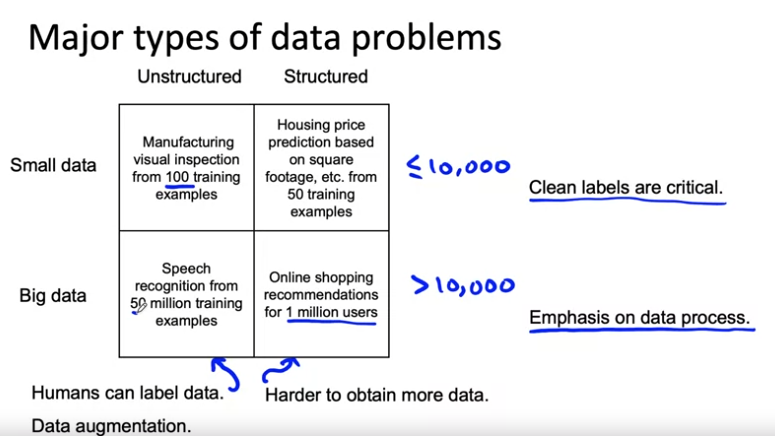

### Obtaining Data

From Week 3 of [Introduction to Machine Learning in Production](https://www.coursera.org/learn/introduction-to-machine-learning-in-production?specialization=machine-learning-engineering-for-production-mlops)

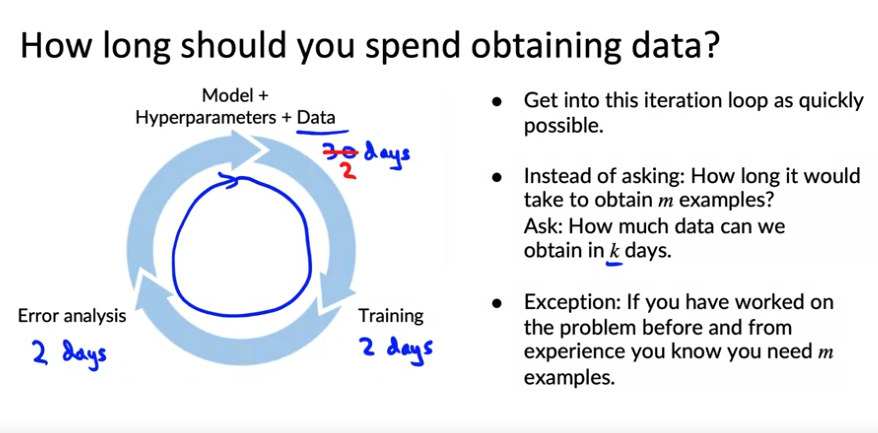

### Data Pipeline

- Although it can be messy in the PoC phase, you still need to take intensive notes to make sure you replicate the same data pipelines in prod. 
- Retaining meta-data might help with this process. 
- Keeping track of data provenance (where data is from) and lineage (the sequence of steps of data processing) helps debug and understand the ML pipelines. It also helps for regulatory compliance.
- Another idea is to version the data as well, so that we have full ML result reproducibility.
- `ml-pipeline` seems an open-source framework to deal with the issues above, but have not tried it out yet.

### Things to watch out in preparation of data

- **Leakage**: Information about labels sneaks into features
- **Sample bias**: Test inputs and deployment inputs have different distributions, also called **distribution skew**.
    - Sometimes that could also be caused by the set of transformations/feature engineering that is done in training is not done/done differently in testing/serving: those errors are typically very hard to find. See the different cases where inconsitencies in feature engineering arise in [data_preprocessing_feature_engineering](data_preprocessing_feature_engineering.ipynb).
- **Schema skew**: training and serving/testing data do not conform to the same schema - this can probably be prevented by a simple check.
- **Nonstationary** or **Domain Shift**: When the thing you are modeling changes over time (note that these terms are used loosely)
    - **Covaraiate Shift** or **Data shift**: input distribution $P(X)$ changes over time
    - **Concept Shift**: correct output $P(y|X)$ for given input changes over time
    - **Label Shift**: label distribution $P(y)$ changes over time.
  
  There are many ways to detect the statistical drifts and skews above, including, from simple to more sophisticated: 
    - checking simple statistics of the distribution can be helpful;
    - formal distribution checks such as KL divergence.
  
  The skews and drifts can be the norm rather than the exception in financial market. Solution can be to recalibrate the model in an online fashion and/or put more weight on most recent data whereby weights are controlled by a half-life parameter. On the other hand, one can argue that since all we care is model performance after all, we can monitor model performance directly rather than paying attention to the drifts and skews.
- Try to have **Meaningful data**
    - maximize predictive signals
    - remove non-informative data
    - watch out for feature space coverage

### What are some advanced labeling techniques?

**Advanced labeling** are techniques to obtain labels automatically, at the expense of some inaccuracies in the labeling process. Advanced labeling techniques are important, since human/expert labeling is expensive (which is why unlabeled data is usually more abundant) and unlabeled data oftentimes holds key to improve our model.

- **Semi-supervised learning**: assign labels to unlabeled data by looking at how the unlabeled data point is associated in the feature space, according the structures or clusters of labeled data. 
    - The structure or clusters can often be obtained using unsupervised learning. The assumption is of course data with similar labels cluster together and there is structure to be found in the feature space. Some sort of distance is usually needed for this exercise.
    - The process to assign labels based on the 'community structure' is called **label propagation**.
- **Active learning**: it is a family of algorithms for intelligently sampling data, i.e. select the points to be labeled that would be most informative for model training. The intelligent sampling techniques include
    - margin sampling: label the points for which the current model is least confident in
    - cluster-based sampling: sample representatives from well-formed clusters to cover the entire feature space
    - query-by-committee: train an emsemble of models and sample points that generate the most disagreement
    - region-based sampling: runs several active learning algorithms in different partitions of the space
- **Weak supervision**
    - Start with unlabeled data, without ground-truth labels
    - We seek or have in our disposal one or more weak supervision sources
        - Can be a list of heuristics by subject-matter experts that can automate labeling, quick and dirty
        - As an example, you can think of it as the contrib on any bond price
    - The noisy labels above have a certain probability of being correct, not $100\%$.
    - The objective is to learn a generative model to determine weights for these weak supervision sources, and a discrimitive model to do the actual learning. Thus this may have implications for contribs weighting.
    - Below is a a flowchart description of Snorkel, an open-source framework to do weak supervision.
    
    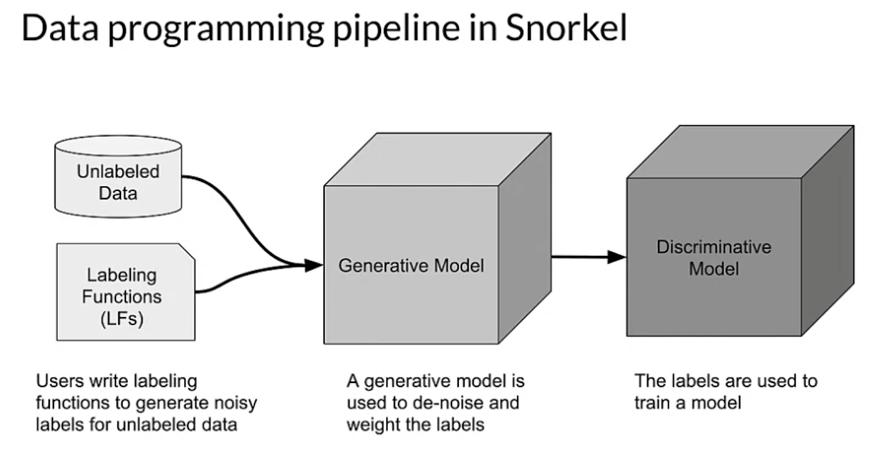

### Data Warehouse and Data Lakes

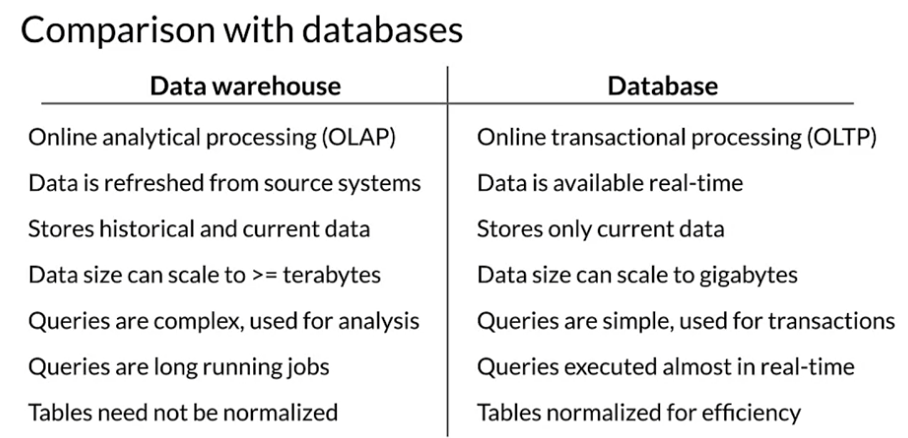

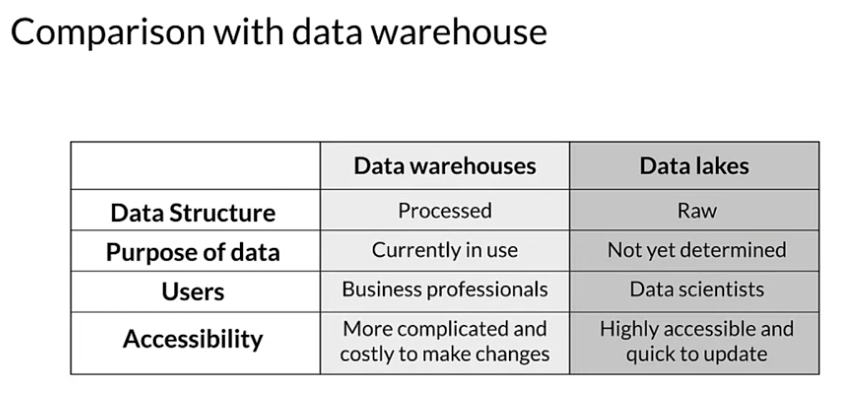

## References
- [Introduction to Machine Learning in Production](https://www.coursera.org/learn/introduction-to-machine-learning-in-production?specialization=machine-learning-engineering-for-production-mlops)
- [Machine Learning Data Lifecyle in Production](https://www.coursera.org/learn/machine-learning-data-lifecycle-in-production?specialization=machine-learning-engineering-for-production-mlops)
    - [advanced sampling](https://www.coursera.org/learn/machine-learning-data-lifecycle-in-production/quiz/GWGxK/advanced-labelling)